# **Problemas de Regresión**

## Ejercicio 1

El conjunto de datos de criminalidad de Estados Unidos publicado en el año 1993 consiste de 51 registros para los que se tienen las siguientes variables:

- VR = crímenes violentos por cada 100000 habitantes
- MR = asesinatos por cada 100000 habitantes
- M = porcentaje de áreas metropolitanas
- W = porcentaje de gente blanca
- H = porcentaje de personas con preparatoria terminada
- P = porcentaje con ingresos por debajo del nivel de pobreza
- S = porcentaje de familias con solo un miembro adulto como tutor

Variable dependiente → **MR**

Variables independientes → **M**, **W**, **H** y **S**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
crime_data = pd.read_csv('/content/crime_data.csv')

In [ ]:
independent_vars = ['M', 'W', 'H', 'S']
dependent_var = 'MR'

### 1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

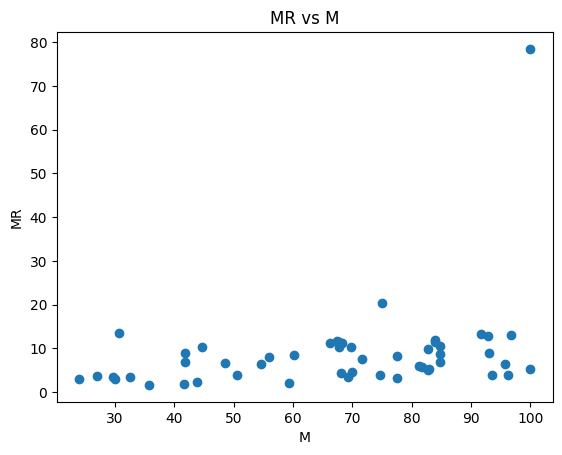

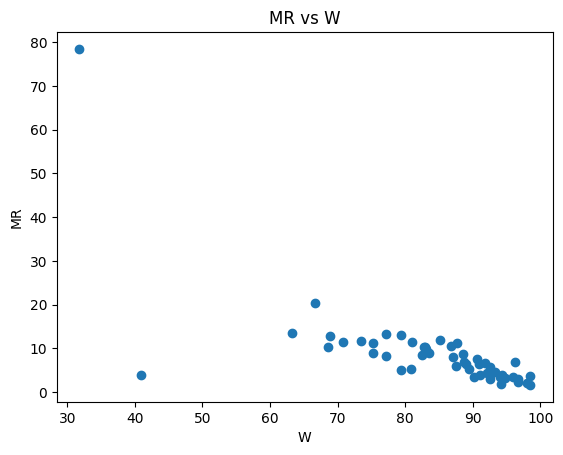

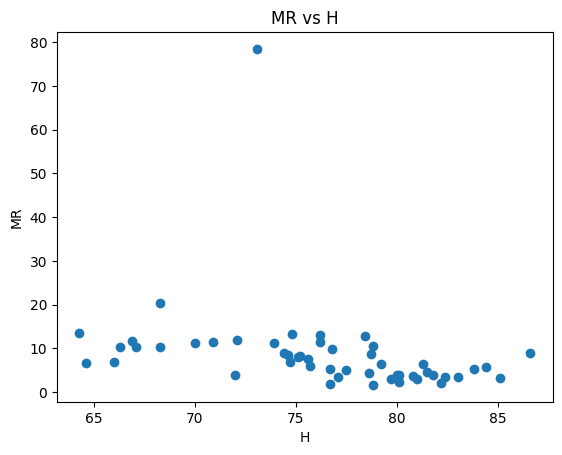

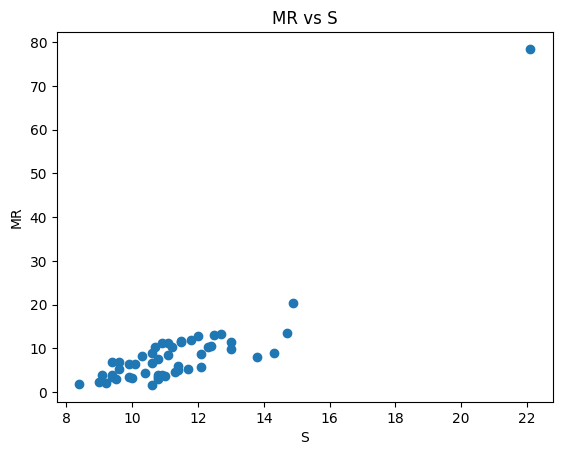

In [ ]:
for data in independent_vars:
    plt.scatter(crime_data[data], crime_data[dependent_var])
    plt.title(f'{dependent_var} vs {data}')
    plt.xlabel(data)
    plt.ylabel(dependent_var)
    plt.show()

In [ ]:
x = crime_data[independent_vars].to_numpy()
y = crime_data[dependent_var]

In [ ]:
X = np.column_stack((np.ones(len(x)), x))

### 2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [ ]:
def fit_model(X, y):
  return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

In [ ]:
beta = fit_model(X, y)
print("Coeficientes del modelo: ", beta)

Coeficientes del modelo:  [-9.47235284  0.03215936 -0.16912874 -0.12137218  3.48850667]


### 3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def predict(X, beta):
  return X @ beta

In [ ]:
y_pred = predict(X, beta)
r = y - y_pred

In [ ]:
n_folds = 5
kf = KFold(n_splits = n_folds, shuffle = True)

In [ ]:
mse_cv = []
mae_cv = []
r2_cv = []

In [ ]:
for train_index, test_index in kf.split(X):
  x_train = X[train_index, :]
  y_train = y[train_index]
  beta_cv = fit_model(x_train, y_train)
  x_test = X[test_index, :]
  y_test = y[test_index]
  y_pred = predict(x_test, beta_cv)

  mse_i = mean_squared_error(y_test, y_pred)
  print('mse = ', mse_i)
  mse_cv.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  print('mae = ', mae_i)
  mae_cv.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  print('r^2= ', r2_i)
  r2_cv.append(r2_i)
  print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:',
  np.average(r2_cv))

mse =  46.82701818292548
mae =  4.864618777963043
r^2=  -2.9027890894985418
MSE: 46.82701818292548  MAE: 4.864618777963043  R^2: -2.9027890894985418
mse =  9.417606518830633
mae =  2.3924697603182885
r^2=  0.6301323724739659
MSE: 28.122312350878055  MAE: 3.628544269140666  R^2: -1.1363283585122879
mse =  23.544842032864214
mae =  4.022381027946146
r^2=  -1.3710817757164362
MSE: 26.596488911540106  MAE: 3.7598231887424927  R^2: -1.2145794975803372
mse =  23.39549922408563
mae =  4.1551859310131025
r^2=  -1.3264288636177577
MSE: 25.796241489676486  MAE: 3.858663874310145  R^2: -1.2425418390896925
mse =  240.7226935230508
mae =  5.669659586185331
r^2=  0.480196099996241
MSE: 68.78153189635135  MAE: 4.220863016685182  R^2: -0.8979942512725059


In [ ]:
print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:',
np.average(r2_cv))

MSE: 68.78153189635135  MAE: 4.220863016685182  R^2: -0.8979942512725059


### 4. Utiliza el método de validación cruzada LOOCV para mostrar los histogramas de MSE y MAE.

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model

In [ ]:
kf = LeaveOneOut()

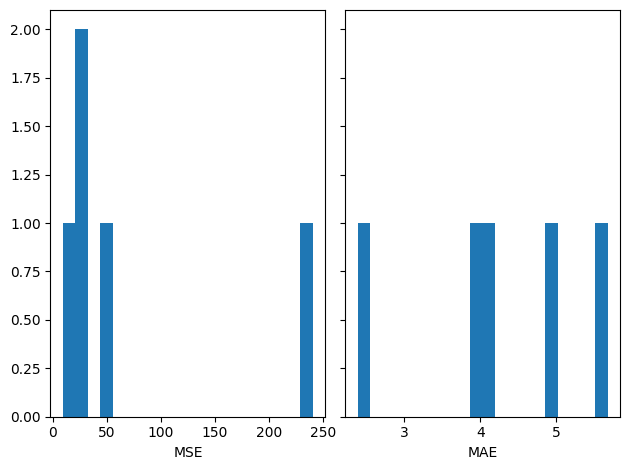

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(mse_cv, bins=20)
axs[0].set_xlabel("MSE")
axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")
plt.show()

### 5. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [ ]:
for data in independent_vars:
    crime_data[f'{data}^2'] = crime_data[data] ** 2

In [ ]:
for i in range(len(independent_vars)):
    for j in range(i + 1, len(independent_vars)):
        col_name = f'{independent_vars[i]}x{independent_vars[j]}'
        crime_data[col_name] = crime_data[independent_vars[i]] * crime_data[independent_vars[j]]

In [ ]:
crime_data.head()

,State,VR,MR,M,W,H,P,S,M^2,W^2,H^2,S^2,MxW,MxH,MxS,WxH,WxS,HxS
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3,1747.24,5655.04,7499.56,204.49,3143.36,3619.88,597.74,6512.32,1075.36,1238.38
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5,4542.76,5402.25,4475.61,132.25,4953.90,4509.06,775.10,4917.15,845.25,769.35
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7,1998.09,6872.41,4395.69,114.49,3705.63,2963.61,478.29,5496.27,887.03,709.41
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1,7174.09,7849.96,6193.69,146.41,7504.42,6665.89,1024.87,6972.82,1072.06,952.27
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5,9350.89,6288.49,5806.44,156.25,7668.31,7368.54,1208.75,6042.66,991.25,952.50


In [ ]:
sq_prod_pairs = ['M', 'W', 'H', 'S', 'M^2', 'W^2', 'H^2', 'S^2', 'MxW', 'MxH', 'MxS', 'WxH', 'WxS', 'HxS']

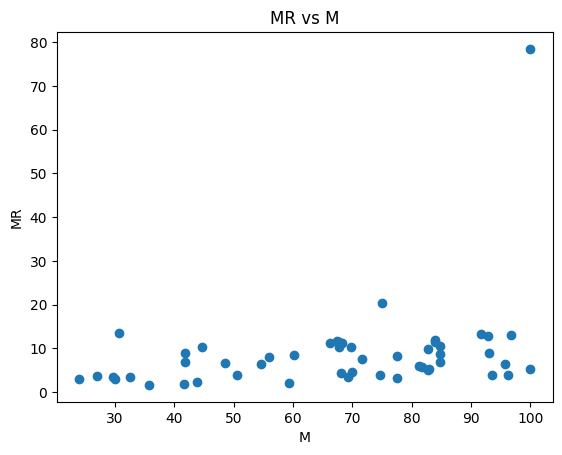

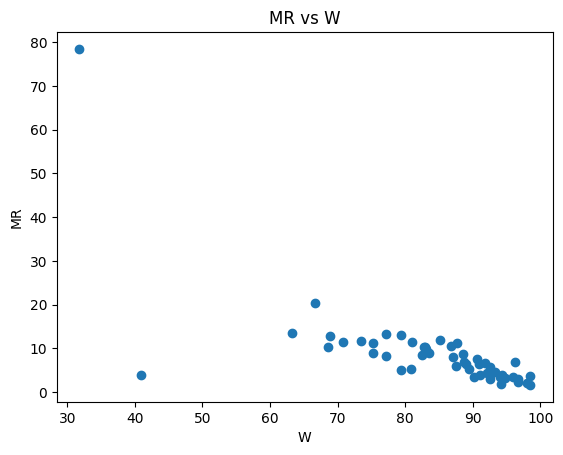

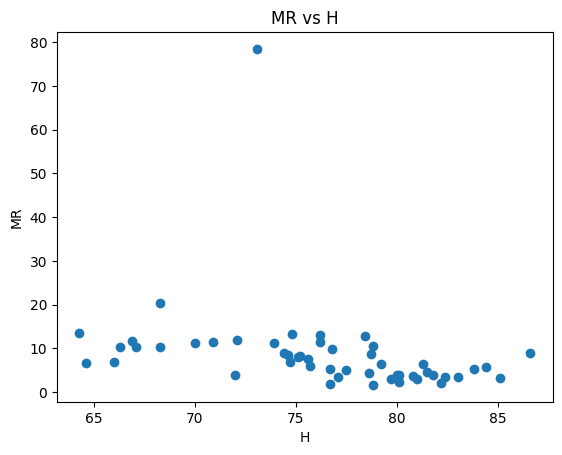

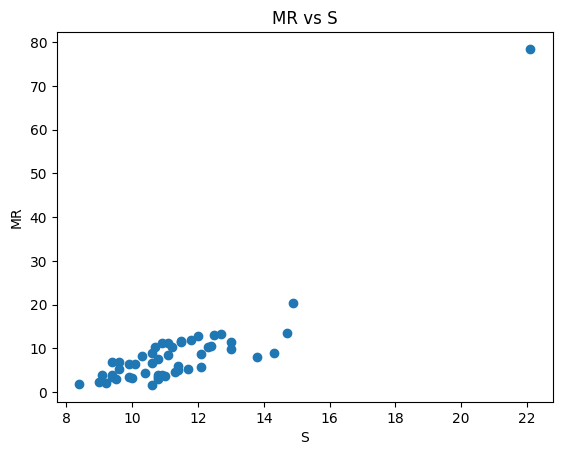

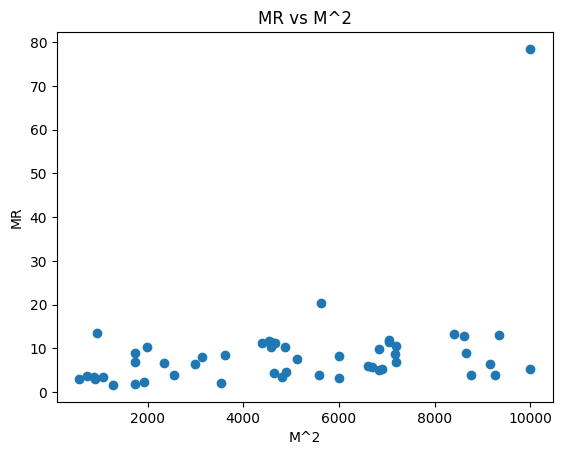

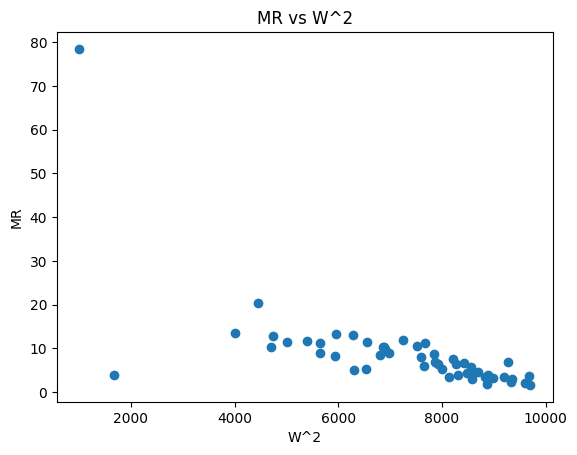

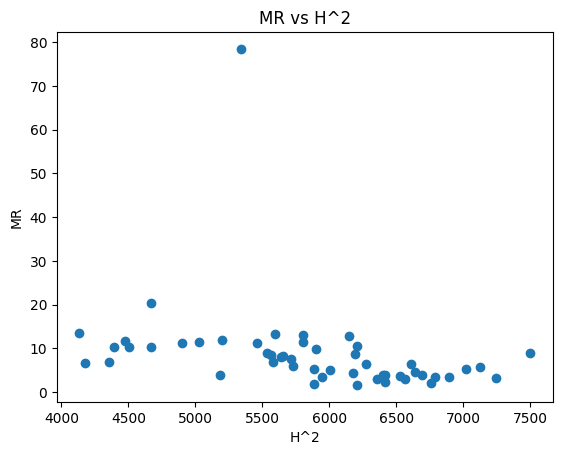

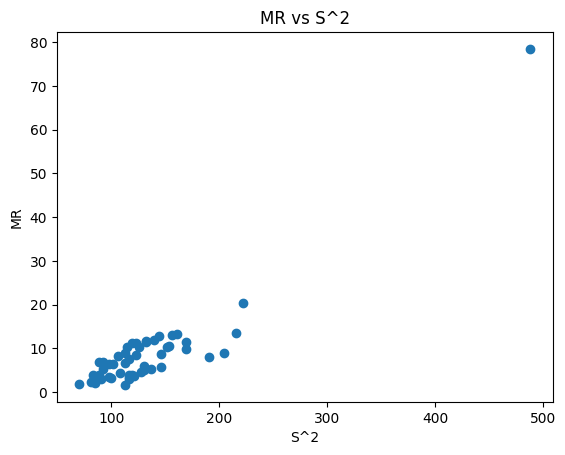

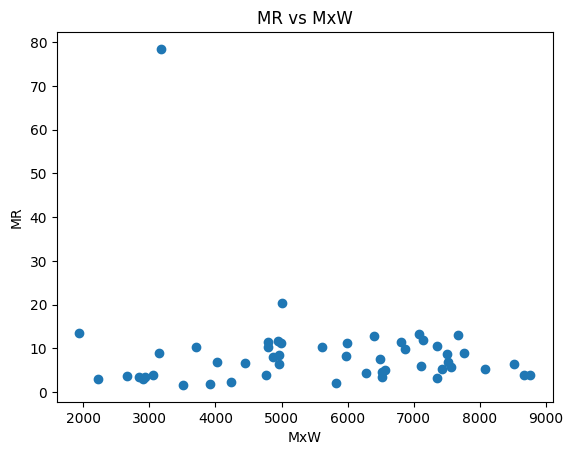

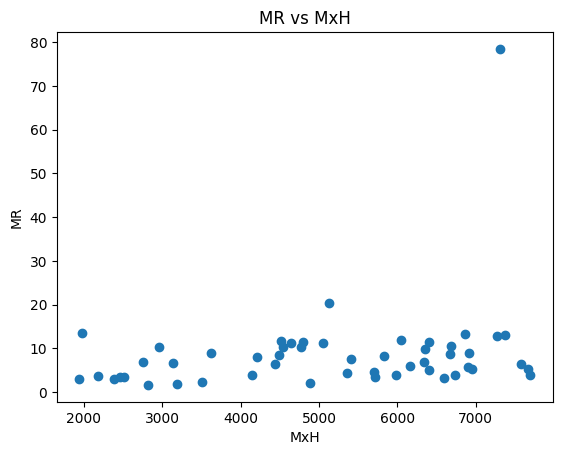

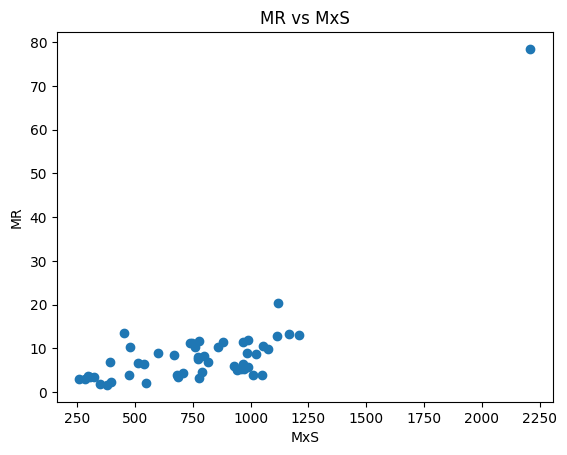

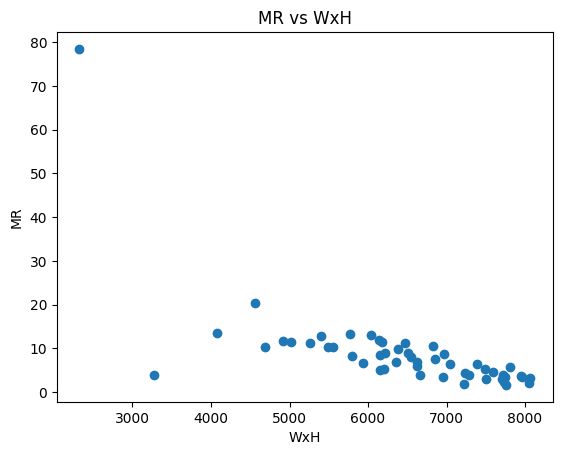

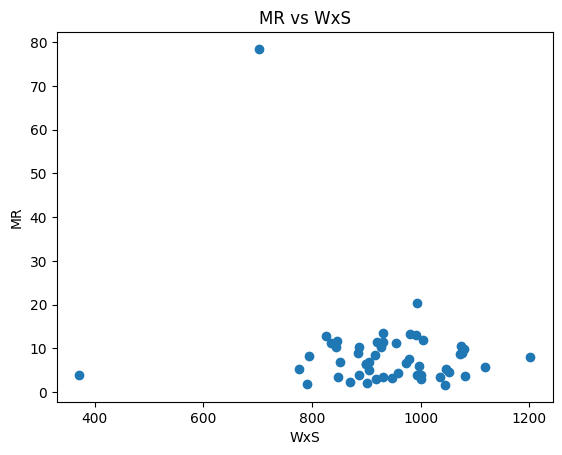

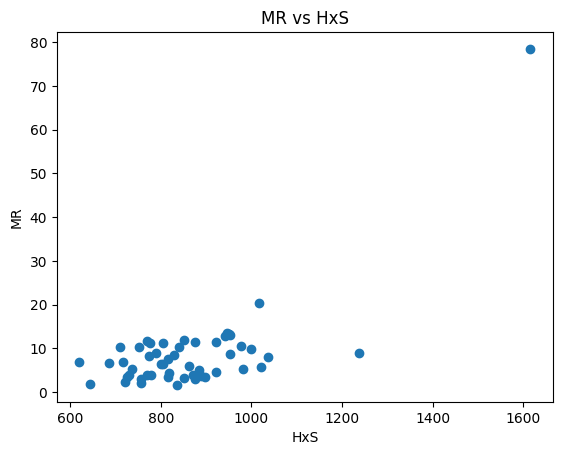

In [ ]:
for data in sq_prod_pairs:
    plt.scatter(crime_data[data], crime_data[dependent_var])
    plt.title(f'{dependent_var} vs {data}')
    plt.xlabel(data)
    plt.ylabel(dependent_var)
    plt.show()

In [ ]:
x = crime_data[sq_prod_pairs].to_numpy()

In [ ]:
X = np.column_stack((np.ones(len(x)), x))

In [ ]:
beta = fit_model(X, y)
print("Coeficientes del modelo: ", beta)

Coeficientes del modelo:  [ 2.35538738e+01  2.46914998e-01  7.27571761e-01 -9.14975088e-01
 -2.40622053e+00 -7.17497444e-04 -2.13852727e-03 -8.02608337e-04
  1.41429026e-01 -3.51839336e-03  5.16239043e-04  1.42675739e-02
  3.27640889e-03 -4.80438653e-02  4.53739278e-02]


In [ ]:
y_pred = predict(X, beta)
r = y - y_pred

In [ ]:
n_folds = 5
kf = KFold(n_splits = n_folds, shuffle = True)

In [ ]:
mse_cv = []
mae_cv = []
r2_cv = []

In [ ]:
for train_index, test_index in kf.split(X):
  x_train = X[train_index, :]
  y_train = y[train_index]
  beta_cv = fit_model(x_train, y_train)
  x_test = X[test_index, :]
  y_test = y[test_index]
  y_pred = predict(x_test, beta_cv)

  mse_i = mean_squared_error(y_test, y_pred)
  print('mse = ', mse_i)
  mse_cv.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  print('mae = ', mae_i)
  mae_cv.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  print('r^2= ', r2_i)
  r2_cv.append(r2_i)
  print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:',
  np.average(r2_cv))

mse =  5.198767196768882
mae =  1.7457433694461764
r^2=  0.6556014547833943
MSE: 5.198767196768882  MAE: 1.7457433694461764  R^2: 0.6556014547833943
mse =  382.64306872568704
mae =  7.472650776387989
r^2=  -40.43131672286446
MSE: 193.92091796122796  MAE: 4.609197072917083  R^2: -19.887857634040532
mse =  10.990742482815772
mae =  2.5689517442723786
r^2=  -0.03529978172718273
MSE: 132.94419280175723  MAE: 3.929115296702182  R^2: -13.270338349936083
mse =  4.056626352681622
mae =  1.3835734532767925
r^2=  0.7597013107358531
MSE: 100.72230118948833  MAE: 3.2927298358458343  R^2: -9.762828434768098
mse =  539.5539297364575
mae =  9.452916014978198
r^2=  -0.13141332371072667
MSE: 188.48862689888216  MAE: 4.524767071672307  R^2: -7.836545412556623


In [ ]:
print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:',
np.average(r2_cv))

MSE: 188.48862689888216  MAE: 4.524767071672307  R^2: -7.836545412556623


### 6. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [ ]:
X = np.column_stack([np.ones(crime_data.shape[0]), crime_data[independent_vars]])

In [ ]:
lambdas = np.logspace(-3,3,100)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
def grad(X, y, beta, lambd):
    n = len(y)
    y_pred = X @ beta
    res = y - y_pred
    tmp = X.transpose() @ res
    return - (2 / n) * tmp + 2 * lambd * beta

In [ ]:
def fit_model_ridge(X, y, lambd=0.001, learning_rate=0.00005, maxit=10000):
    n_predictors = X.shape[1]
    beta = 2 * np.random.rand(n_predictors) - 1.0
    i = 0
    while (np.linalg.norm(grad(X, y, beta, lambd)) > 1e-4) and (i < maxit):
        beta = beta - learning_rate * grad(X, y, beta, lambd)
        i += 1
    return beta

In [ ]:
coefs = []

In [ ]:
for lambd in lambdas:
    beta = fit_model_ridge(X_scaled, y, lambd=lambd)
    coefs.append(beta)

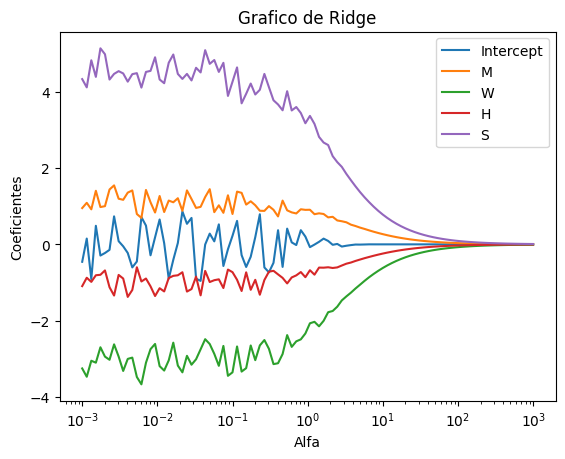

In [ ]:
names = ['Intercept', 'M', 'W', 'H', 'S']

for i, name in enumerate(names):
    coef_values = [coef[i] for coef in coefs]
    plt.plot(lambdas, coef_values, label=name)

plt.xscale('log')
plt.xlabel('Alfa')
plt.ylabel('Coeficientes')
plt.title('Grafico de Ridge')
plt.legend()
plt.show()

### 7. Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
X = np.column_stack([np.ones(crime_data.shape[0]), crime_data[independent_vars]])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
lasso = Lasso()

In [ ]:
alphas = np.logspace(-3, 6, 50)

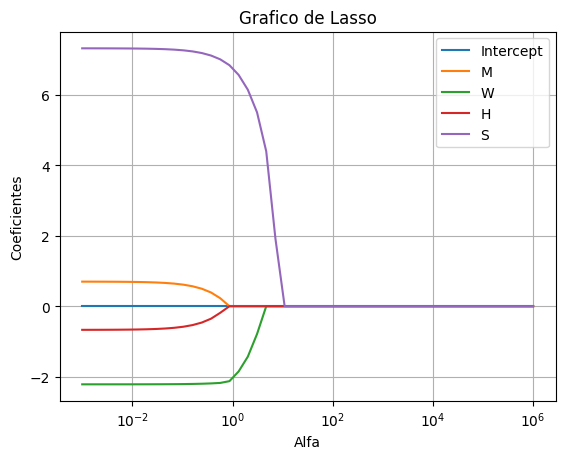

In [ ]:
for i in range(len(names)):
    coef_values = []
    for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_scaled, y)
        coef_values.append(lasso.coef_[i])
    plt.plot(alphas, coef_values, label=names[i])

plt.xscale('log')
plt.xlabel('Alfa')
plt.ylabel('Coeficientes')
plt.title('Grafico de Lasso')
plt.legend()
plt.grid(True)
plt.show()

**Modelo de Regresión Lineal Simple**

→ Coeficientes del modelo: [-9.47, 0.03, -0.17, -0.12, 3.49]

- MSE: 81.95
- MAE: 4.87
- R^2: -1.84

**Modelo de Regresión Lineal Múltiple**

→ Coeficientes del modelo: [23.55, 0.25, 0.73, -0.91, -2.41, -0.00, -0.00, -0.00, 0.14, -0.00, 0.00, 0.01, 0.00, -0.05, 0.04]

- MSE: 49.42
- MAE: 3.07
- R^2: 0.12

### 8. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

a. **¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?**

No, ya que con los resultados de este modelo se puede observar que los valores de MSE y MAE sugieren que el modelo no tiene tan buen rendimiento en diferentes conjuntos de datos de prueba. Además, el valor negativo de R^2 indica que el modelo no explica bien la varianza de la variable de respuesta. Por otro lado, los histogramas muestran una dispersión significativa en los errores, lo cual indica que el modelo no es consistente en la predicción de los valores de respuesta. Es por esto que no se puede considerar efectivo este modelo de regresión lineal para modelar los datos del problema.

b.  **¿Observas una variabilidad importante en los valores de R^2, MSE y MAE cuando aplicas validación cruzada?**

Sí, los valores de R^2 varían considerablemente desde -7.96 hasta 0.88. Un valor negativo indica que el modelo no está explicando bien la varianza de la variable de respuesta, mientras que un valor positivo indica un mejor ajuste, pero aún así, existe una gran variabilidad en la calidad del ajuste. Los valores de MSE varían desde 1.64 hasta 204.57, esta amplia variación en los valores indica que el modelo tiene un rendimiento variable en diferentes conjuntos de datos de prueba. Los valores de MAE varían desde 1.17 hasta 7.25, al igual que con el MSE, los valores de MAE muestran una variabilidad importante, lo que indica que el modelo no es consistente en la precisión de sus predicciones al aplicar validación cruzada.

c. **¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?**

El cuadrático, aunque no es un modelo perfecto, tiene un R^2 positivo y cuenta con valores de MSE y MAE más bajos en comparación con el modelo lineal simple.

d. **¿Qué variables son más relevantes para el modelo según Ridge y Lasso?**

En el gráfico de Ridge, se observa que a medida que lambda aumenta, los coeficientes de todas las variables tienden a disminuir gradualmente hacia cero, sin embargo nunca llegan a cero por completo, esto sugiere que Ridge no realiza selección de características y todas las variables contribuyen en alguna medida a las predicciones. Por otro lado, en el gráfico de Lasso, se observa que a medida que alfa aumenta, algunos coeficientes de variables se igualan a cero, entonces las variables con coeficientes que son distintos a cero son las que se consideran más relevantes para el modelo. Al observar las gráficas se puede notar que las variables más relevantes para el modelo son ‘M’ y ‘H’.

e. **¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?**

Sí, pues se puede observar que las variables ‘M’, ‘W’ y ‘H’  parecen estar relacionadas de forma inversa con la tasa de criminalidad, sugiriendo que en áreas metropolitanas, con un mayor porcentaje de gente blanca y con un mayor porcentaje de personas con preparatoria terminada, la criminalidad tiende a ser más baja. Por otro lado, la variable ‘S’ parece estar relacionada positivamente con la tasa de criminalidad, indicando que en áreas con un mayor porcentaje de familias con solo un miembro adulto como tutor tienden a tener una tasa de criminalidad más alta.

## Ejercicio 2

In [ ]:
life_expectancy = pd.read_csv('/content/life_expectancy_data.csv')

### 1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [ ]:
life_expectancy = life_expectancy.dropna()

In [ ]:
independent_vars = life_expectancy[['Adult Mortality','Alcohol','percentage expenditure',
'Hepatitis B',' BMI ','under-five deaths ','Polio','Diphtheria ',' HIV/AIDS','GDP',
' thinness  1-19 years',' thinness 5-9 years','Income composition of resources']]

dependent_var = life_expectancy['Life expectancy ']

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

In [ ]:
for train_index, test_index in kf.split(independent_vars):
    X_train, X_test = independent_vars.iloc[train_index], independent_vars.iloc[test_index]
    y_train, y_test = dependent_var.iloc[train_index], dependent_var.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)

In [ ]:
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_r2 = np.mean(r2_scores)

In [ ]:
print(f'Media MSE: {mean_mse}')
print(f'Desviacion estandar MSE: {std_mse}')
print(f'R2:{mean_r2}')

Media MSE: 15.95389839408978
Desviacion estandar MSE: 1.5142565920085962
R2:0.7902975953049364


### 2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [ ]:
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, r_regression

In [ ]:
independent_vars = life_expectancy[['Adult Mortality','Alcohol','percentage expenditure',
'Hepatitis B',' BMI ','under-five deaths ','Polio','Diphtheria ',' HIV/AIDS','GDP',
' thinness  1-19 years',' thinness 5-9 years','Income composition of resources']].values

dependent_var = life_expectancy['Life expectancy '].values

In [ ]:
n_feats = [1,2,3,4,5,6,7,8,9,10,11,12,13]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

In [ ]:
for n_feat in n_feats:
    print('Feature', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(independent_vars):
        x_train = independent_vars[train_index, :]
        y_train = dependent_var[train_index]

        fselection_cv = SelectKBest(r_regression, k=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv = linear_model.LinearRegression()
        regr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(independent_vars[test_index, :])
        y_test = dependent_var[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

Feature 1
MSE: 37.251158353474565  MAE: 4.243946120003741  R^2: 0.5195761559939605
Feature 2
MSE: 34.2657473344079  MAE: 4.16403556552604  R^2: 0.55471767749369
Feature 3
MSE: 33.49807423538474  MAE: 4.158864210129925  R^2: 0.5649509332229592
Feature 4
MSE: 32.918646333911276  MAE: 4.13039503638782  R^2: 0.5729889596580211
Feature 5
MSE: 32.9249582988953  MAE: 4.123711350722782  R^2: 0.5736188506628455
Feature 6
MSE: 32.24551896526364  MAE: 4.076666968091289  R^2: 0.5788565259685032
Feature 7
MSE: 32.414471701325446  MAE: 4.069788292013375  R^2: 0.58138538471576
Feature 8
MSE: 32.103352509964836  MAE: 4.064802614641232  R^2: 0.5837870688709987
Feature 9
MSE: 31.921158231665657  MAE: 4.068654130392703  R^2: 0.5852451292649422
Feature 10
MSE: 32.02443062817666  MAE: 4.085527553550953  R^2: 0.5852884213537562
Feature 11
MSE: 31.677593541697565  MAE: 4.060134022780893  R^2: 0.5889003368560275
Feature 12
MSE: 19.396893561558166  MAE: 3.3358808717925017  R^2: 0.7480704582746777
Feature 13
MS

In [ ]:
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Numero optimo de features: ", opt_features)

Numero optimo de features:  13


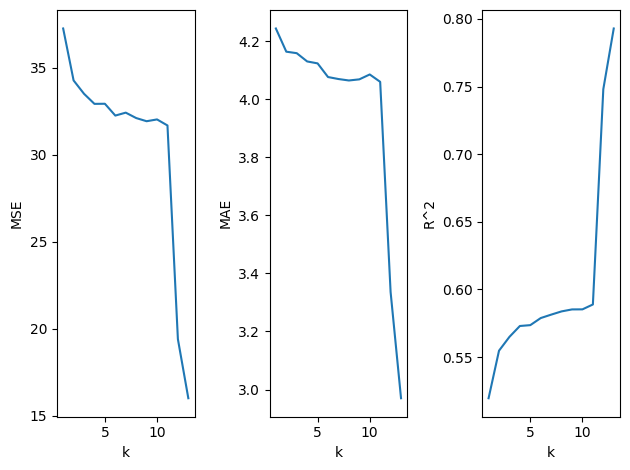

In [ ]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("R^2")

plt.show()

In [ ]:
regr = linear_model.LinearRegression()
fselection = SelectKBest(r_regression, k=opt_features)
fselection.fit(independent_vars, dependent_var)

SelectKBest(k=13, score_func=<function r_regression at 0x7a60ba790700>)

In [ ]:
print("Features: \n\t", fselection.get_feature_names_out())
x_transformed = fselection.transform(independent_vars)
regr.fit(x_transformed, dependent_var)
print("\n")
print("Coeficientes: \n\t", regr.coef_)
print("\n")
print("Intercepto: \n\t", regr.intercept_)

Features: 
	 ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12']


Coeficientes: 
	 [-1.96994569e-02  3.45870007e-02  2.44581955e-04 -5.27410042e-03
  5.50687685e-02 -2.59113222e-03  1.74407273e-02  2.34737374e-02
 -4.32085448e-01  5.05043308e-05 -6.25244236e-02  1.05458390e-02
  1.69019221e+01]


Intercepto: 
	 57.44131799006827


### 3. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import ShuffleSplit

In [ ]:
n_feats = [1,2,3,4,5,6,7,8,9,10]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
ss = ShuffleSplit(n_splits=5, test_size=0.2)

In [ ]:
for n_feat in n_feats:
    print('Features', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(independent_vars):
        x_train = independent_vars[train_index, :]
        y_train = dependent_var[train_index]

        regr_cv = linear_model.LinearRegression()
        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        regr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(independent_vars[test_index, :])
        y_test = dependent_var[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

Features 1
MSE: 37.44154613098327  MAE: 4.251547471036384  R^2: 0.5134328924617708
Features 2
MSE: 23.186152462382463  MAE: 3.178812267381523  R^2: 0.6985202685692318
Features 3
MSE: 18.60279131877767  MAE: 3.0713705652133854  R^2: 0.7569685970212919
Features 4
MSE: 17.29224390841866  MAE: 3.039492143799434  R^2: 0.7760104920477173
Features 5
MSE: 16.43725116093081  MAE: 2.994858043248665  R^2: 0.7867845848897741
Features 6
MSE: 16.070505624383152  MAE: 2.969404891413661  R^2: 0.7919138988778565
Features 7
MSE: 16.034855417600827  MAE: 2.966013614738931  R^2: 0.7925007469331126
Features 8
MSE: 16.195097049030604  MAE: 2.9733593339470588  R^2: 0.7898271399633184
Features 9
MSE: 15.873356026561959  MAE: 2.9475108387920264  R^2: 0.7934342100552498
Features 10
MSE: 15.897711233355546  MAE: 2.942572683284467  R^2: 0.7939050575506309


In [ ]:
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]

In [ ]:
print("Numero optimo de features:", opt_features)

Numero optimo de features: 9


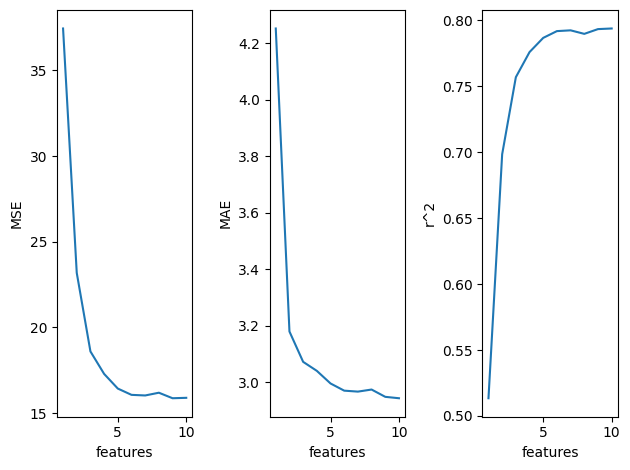

In [ ]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()

In [ ]:
regression = linear_model.LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select=opt_features)
fselection.fit(independent_vars, dependent_var)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=9)

In [ ]:
print("Features: \n\t", fselection.get_feature_names_out())
x_transformed = fselection.transform(independent_vars)
regr.fit(x_transformed, dependent_var)
print("\n")
print("Coeficientes: \n\t", regr.coef_)
print("\n")
print("Intercepto: \n\t", regr.intercept_)

Features: 
	 ['x0' 'x2' 'x4' 'x6' 'x7' 'x8' 'x9' 'x10' 'x12']


Coeficientes: 
	 [-1.94943142e-02  2.64661354e-04  5.52476938e-02  1.83093492e-02
  2.21629531e-02 -4.26299407e-01  5.07680752e-05 -1.02822165e-01
  1.69913764e+01]


Intercepto: 
	 57.225867832445836


### 4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

In [ ]:
from sklearn.feature_selection import SelectKBest, RFE

In [ ]:
n_feats = [2,3,4,5,6,7,8,9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

In [ ]:
for n_feat in n_feats:
    print('Features =', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(independent_vars):
        x_train = independent_vars[train_index, :]
        y_train = dependent_var[train_index]

        regr_cv = linear_model.LinearRegression()
        f_selector = SelectKBest(k=n_feat)
        f_selector.fit(x_train, y_train)
        x_train_selected = f_selector.transform(x_train)

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train_selected, y_train)
        x_train_final = fselection_cv.transform(x_train_selected)

        regr_cv.fit(x_train_final, y_train)

        x_test_selected = f_selector.transform(independent_vars[test_index, :])
        x_test_final = fselection_cv.transform(x_test_selected)
        y_test = dependent_var[test_index]
        y_pred = regr_cv.predict(x_test_final)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

Features = 2
MSE: 34.757163056652125  MAE: 4.478024975298958  R^2: 0.5504016653348502
Features = 3
MSE: 18.550417077581812  MAE: 3.0721428944528157  R^2: 0.7592192420880144
Features = 4
MSE: 17.669894480108393  MAE: 3.0467218893881656  R^2: 0.7691289195438415
Features = 5
MSE: 17.60776436151045  MAE: 3.0383884569798663  R^2: 0.7721668697332988
Features = 6
MSE: 16.660842583164722  MAE: 3.00867279711876  R^2: 0.7832323502887466
Features = 7
MSE: 16.54349806839925  MAE: 2.992831646783044  R^2: 0.7844999958882106
Features = 8
MSE: 16.295872149158942  MAE: 2.972130966056798  R^2: 0.7876027942534984
Features = 9
MSE: 16.28864254267687  MAE: 2.9733978832181402  R^2: 0.7894994170812326


In [ ]:
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]

In [ ]:
print("Numero optimo de features:", opt_features)

Numero optimo de features: 9


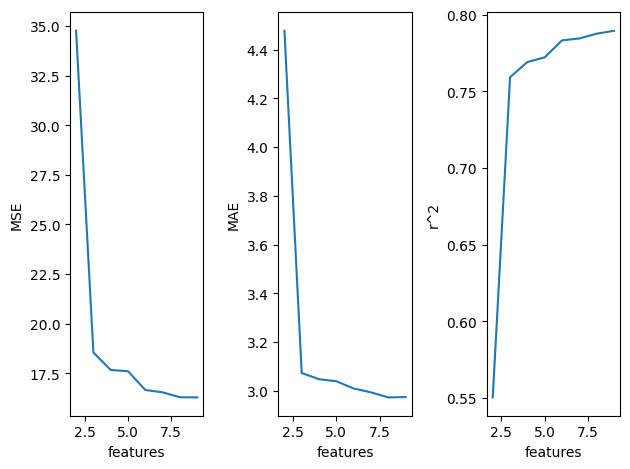

In [ ]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()

In [ ]:
regression = linear_model.LinearRegression()
fselection = RFE(regr, n_features_to_select=opt_features)
fselection.fit(independent_vars, dependent_var)

RFE(estimator=LinearRegression(), n_features_to_select=9)

In [ ]:
print("Features: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(independent_vars)
regr.fit(x_transformed, dependent_var)
print("Coeficientes: ", fselection.estimator_.coef_)
print("Intercepto: ", fselection.estimator_.intercept_)

Features:  ['x0' 'x1' 'x4' 'x6' 'x7' 'x8' 'x10' 'x11' 'x12']
Coeficientes:  [-2.04295674e-02  9.48053330e-02  5.44661608e-02  1.76010949e-02
  2.13805545e-02 -4.23791840e-01 -8.36204337e-02 -2.61597022e-02
  1.80322317e+01]
Intercepto:  56.94873209554694


### 5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
n_feats = [1,2,3,4,5,6,7,8,9,10]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

In [ ]:
for n_feat in n_feats:
    print('Features =', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(independent_vars):
        x_train = independent_vars[train_index, :]
        y_train = dependent_var[train_index]

        knn_regr_cv = KNeighborsRegressor()
        f_selector = SelectKBest(score_func=f_regression, k=n_feat)
        f_selector.fit(x_train, y_train)
        x_train_selected = f_selector.transform(x_train)

        knn_regr_cv.fit(x_train_selected, y_train)

        x_test_selected = f_selector.transform(independent_vars[test_index, :])
        y_test = dependent_var[test_index]
        y_pred = knn_regr_cv.predict(x_test_selected)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

Features = 1
MSE: 24.87635856387584  MAE: 3.7356840379478684  R^2: 0.6764445777933605
Features = 2
MSE: 14.968140467532468  MAE: 2.383218494980197  R^2: 0.8064994733001128
Features = 3
MSE: 8.640076015105464  MAE: 2.1767385465598235  R^2: 0.8878718356133055
Features = 4
MSE: 7.0925643091093304  MAE: 1.8024664640324215  R^2: 0.9079318250339451
Features = 5
MSE: 6.869255927788524  MAE: 1.7225508704061894  R^2: 0.9114471671820941
Features = 6
MSE: 6.372878087132726  MAE: 1.6727633047803259  R^2: 0.9174057926929666
Features = 7
MSE: 19.163807603573733  MAE: 3.052828663535047  R^2: 0.7528314169645456
Features = 8
MSE: 19.6910090227503  MAE: 3.09235648890117  R^2: 0.7450033667191606
Features = 9
MSE: 19.585679719996314  MAE: 3.1074438242608458  R^2: 0.7467917450035807
Features = 10
MSE: 19.834478419452886  MAE: 3.1533307175094407  R^2: 0.7426517153804854


In [ ]:
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]

In [ ]:
print("Numero optimo de features:", opt_features)

Numero optimo de features: 6


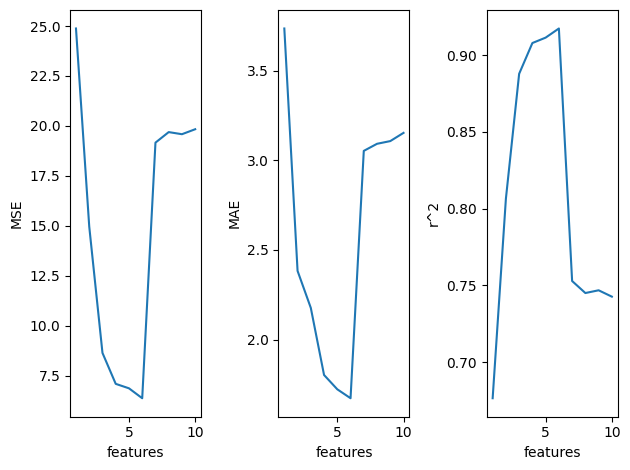

In [ ]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()

In [ ]:
knn_regr = KNeighborsRegressor()
f_selector = SelectKBest(score_func=f_regression, k=opt_features)
f_selector.fit(independent_vars, dependent_var)
x_selected = f_selector.transform(independent_vars)

knn_regr.fit(x_selected, dependent_var)

print("Features: ", f_selector.get_feature_names_out())

Features:  ['x0' 'x4' 'x8' 'x10' 'x11' 'x12']


### 6. Agregue la variables "Status" (segunda columna) como variable predictora, y utiliza un árbol de decisión para generar un modelo de regresión para la varible Life expectancy". Evalúa este modelo con validación cruzada utilizando la métrica adecuada.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
life_expectancy['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
dummies= pd.get_dummies(life_expectancy['Status'],prefix='Status')

In [ ]:
life_expectancy = pd.concat([life_expectancy,dummies],axis=1)
life_expectancy.drop('Status', axis = 1, inplace = True)
life_expectancy.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [ ]:
features = life_expectancy[['Adult Mortality','Alcohol','percentage expenditure',
'Hepatitis B',' BMI ','under-five deaths ','Polio','Diphtheria ',' HIV/AIDS','GDP',
' thinness  1-19 years',' thinness 5-9 years','Income composition of resources']]

target = life_expectancy['Life expectancy ']

In [ ]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
r2_scores = []

In [ ]:
for train_index, test_index in kf.split(features):
    x_train, x_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    tree_regressor = DecisionTreeRegressor()
    tree_regressor.fit(x_train, y_train)
    y_pred = tree_regressor.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

In [ ]:
print("R^2 scores:", r2_scores)
print("Promedio de R^2:", np.mean(r2_scores))

R^2 scores: [0.8944969193371859, 0.9125630710287854, 0.9279348052827187, 0.9225114819818561, 0.9126682245061584]
Promedio de R^2: 0.9140349004273409


### 7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:

a. ¿**Consideras que el modelo de regresión lineal es adecuado para los datos? ¿Por qué?**

Sí, considero que es adecuado aunque podría mejorarse. El valor de R^2 indica que el modelo tiene cierta capacidad para explicar la variabilidad en los datos. Sin embargo, la desviación estándar del MSE sugiere que todavía hay una cantidad significativa de variabilidad no explicada por el modelo, lo cual significa que las predicciones del modelo pueden no ser tan precisas como se esperaría.

b. **¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?**

El método de selección que mejor funciona con los datos es el de Filter-Wrapper, pues reune elementos de los métodos Filter y Wrapper, y al ser recursivo elimina iterativamente las características menos importantes. Por lo tanto, es una opción eficiente para reducir la dimensionalidad del conjunto de datos sin perder información importante.

c. **Del proceso de selección de características, ¿Puedes identificar alguna que sea sobresaliente? ¿Qué información relevantes observas de dichas características?**

Sí, a partir de los resultados obtenidos es posible identificar variables que sobresalen debido a su persistencia en múltiples enfoques de selección y ofrecen información importante sobre los factores que influyen en la esperanza de vida en una población. Por ejemplo, la variable de ‘mortalidad de adultos’ destaca en todos los modelos de selección que fueron hechos, pues estuvo presente de manera constante, lo cual indica que tuvo un impacto significativo en la predicción de la esperanza de vida. Así como también destaca la variable de ‘composición de ingresos de recursos’ , lo cual indica que el nivel de ingresos y la distribución de recursos tiene una gran influencia en la esperanza de vida.

d. **¿El modelo de regresión no lineal funcionó mejor que el lineal? ¿Por qué?**

Sí, pues los resultados de R^2 y MSE del modelo de regresión lineal indican que el modelo de regresión no lineal funcionó mejor en términos de rendimiento predictivo, especialmente cuando se utilizaron cuatro features.

e. **¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"? ¿Por qué?**

Al agregar la variable ‘Status’ se puede observar una mejora en la capacidad predictiva del modelo en comparación con los otros modelos utilizados. Esto debido a que ‘Status’ desempeña un papel importante en la predicción de la esperanza de vida y como consecuencia el modelo de árbol de decisión puede aprovechar esta información para realizar predicciones más precisas.

f. **¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión?**

Sí, en primer lugar, se puede destacar la importancia de reunir variables clave para la predicción de la esperanza de vida. Los resultados obtenidos indican que hay factores que son esenciales para comprender y predecir la esperanza de vida, por lo que se demuestra la necesidad de recopilar datos precisos y esenciales en distintos estudios para poder avanzar a mejores conclusiones. Además, los modelos utilizados revelan que la relación entre estas variables y la esperanza de vida puede ser más compleja de lo que uno podría imaginar. Los modelos no lineales, como el K-vecinos más cercanos y el árbol de decisión, superaron al modelo lineal, lo cual nos indica que las relaciones pueden incluso llegar a ser multifacéticas. Finalmente, también se puede concluir que los resultados de este análisis demuestran perfectamente cómo los modelos de regresión pueden ser herramientas poderosas para informar y respaldar decisiones basadas en datos de la vida real.